In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')

import numpy as np
import pandas as pd
from spykes.neurovis import NeuroVis
from spykes.popvis import PopVis

## 0.1 Download data

#### Download all files [[here](https://figshare.com/articles/Ramkumar_et_al_2016_Premotor_and_motor_cortices_encode_reward/3573447)]. We'll only be looking at Mihili_08062013.mat (Monkey M, Session 4)  

## 0.2 Read In Data

In [2]:
import scipy.io
mat = scipy.io.loadmat('3573447/Mihili_08062013.mat')

## 0.3 Initialize Variables


In [3]:
event = 'rewardTime'
condition = 'rewardBool'
window = [-500, 1500]
binsize = 10

### 1.1. Initiate all Neurons

In [4]:
def get_spike_time(raw_data, neuron_number):
    
    spike_times = raw_data['alldays'][0]['PMd_units'][0][:][neuron_number-1][0][1:]
    spike_times = [i[0] for i in spike_times]
    
    return spike_times

In [5]:
def initiate_neurons(raw_data):
    
    neuron_list = list()
    
    for i in range((raw_data['alldays'][0]['PMd_units'][0][:]).shape[0]):
        spike_times = get_spike_time(raw_data, i+1)

        # instantiate neuron
        neuron = NeuroVis(spike_times, name = 'PMd %d' % (i+1))
        neuron_list.append(neuron)
        
    return neuron_list

In [6]:
neuron_list = initiate_neurons(mat)

### 1.2. Get event times

In [7]:
def create_data_frame(raw_data):

    data_df = pd.DataFrame()
    
    uncertainty_conditions = list()
    center_target_times = list()
    target_times = list()
    cue_times = list()
    reward_times = list()
    reward_outcomes = list()
    
    for i in range((raw_data['alldays'].shape)[0]):
        
        meta_data = raw_data['alldays'][i]['tt'][0]
        
        uncertainty_conditions.append(meta_data[:,2])
        center_target_times.append(meta_data[:,3])
        reward_times.append(meta_data[:,6])
        reward_outcomes.append(meta_data[:,7])
        
    data_df['uncertaintyCondition'] = np.concatenate(uncertainty_conditions)
    data_df['centerTargetTime'] = np.concatenate(center_target_times)
    data_df['rewardTime'] = np.concatenate(reward_times)
    data_df['rewardOutcome'] = np.concatenate(reward_outcomes)
        
    data_df['rewardBool'] = data_df['rewardOutcome'].map(lambda s: s == 32)
    
    return data_df[(data_df['uncertaintyCondition'] == 5.0) | (data_df['uncertaintyCondition'] == 50.0)]


In [8]:
data_df = create_data_frame(mat)
print len(data_df)
data_df.head()

1054


,uncertaintyCondition,centerTargetTime,rewardTime,rewardOutcome,rewardBool
278,5.0,1464.498433,1467.493,34.0,False
279,50.0,1477.015533,1479.947,32.0,True
280,5.0,1481.082633,1483.947,34.0,False
281,50.0,1489.009300,1492.375,32.0,True
282,50.0,1498.624167,1501.488,34.0,False


### 1.3. Create PopVis Object

[False, True]


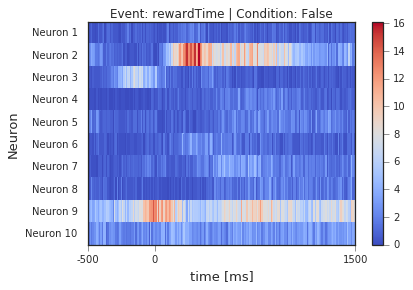

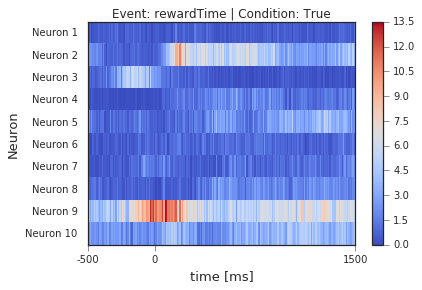

In [9]:
neuron_list = initiate_neurons(mat)[:10]
pop = PopVis(neuron_list)
all_psth = pop.get_psths(event=event, df=data_df, conditions=condition, window=window, binsize=binsize, plot=True)